# Abgabe 3

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

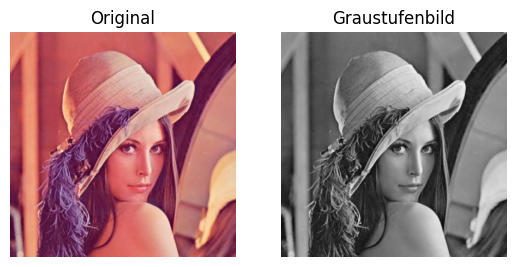

In [43]:
#load images
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg', '.png')):
        img = io.imread(file)
        images.append(img)

#convert to gray image 
def gray_converter(image):
    gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
    gray_image = gray_image.astype('uint8')
    return gray_image

gray_image = gray_converter(images[0])

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(images[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Graustufenbild")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
 
plt.show()



2. Implementierung der Faltung mit Filtermasken

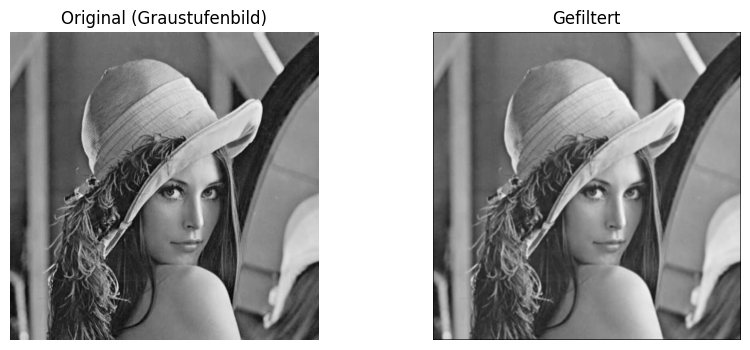

In [44]:
#smoothing filter
smooth_filter = np.array([[0.075, 0.125, 0.075],
                    [0.125, 0.200, 0.125],
                   [0.075, 0.125, 0.075]], dtype= float)

#gauss filter
gauss_filter = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]], dtype=float)


def filter(in_image, filter, off):

    image_h, image_w = in_image.shape
    filter_h, filter_w = filter.shape

    s = 1.0 / np.sum(filter) #normalization

    #filter matrix (2K+1)×(2L+1)
    K = filter_w // 2
    L = filter_h // 2


    copy = in_image.copy()
    out_image = np.zeros_like(in_image)
    

    for v in range(L, image_h - L, off):
        for u in range(K, image_w - K, off):
            sum = 0.0
            for j in range(- L, L + 1):
                for i in range(- K, K + 1):
                    p = copy[v + j, u + i] #[y,x]
                    c = filter[j + L][i + K]
                    sum += c * p
            
            q = int(np.round(s * sum))
            if q < 0: q = 0
            if q > 255: q = 255
            out_image[v, u] = q
        
    return out_image

filtered_img = filter(gray_image, smooth_filter, 1)
filtered_img = filter(gray_image, gauss_filter, 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original (Graustufenbild)")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gefiltert")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()
